<a href="https://colab.research.google.com/github/clashleyuncc/Intro-To-ML/blob/main/HW3P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433
F1: 0.9629629629629629


Text(0.5, 427.9555555555555, 'Predicted label')

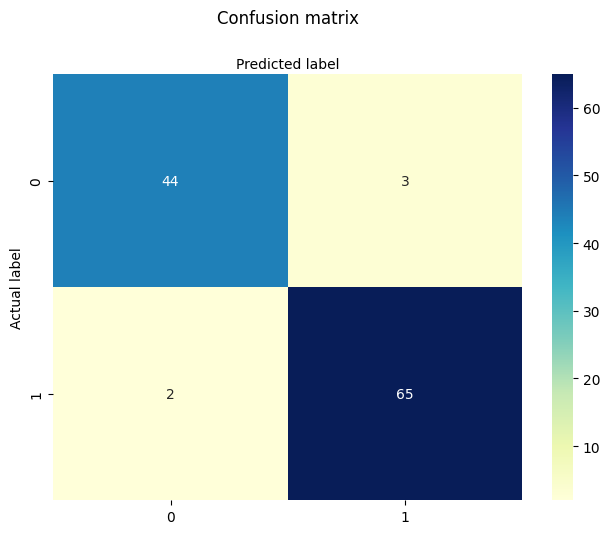

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Problem 2a

breast = load_breast_cancer()
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)

breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels

breast_dataset['label'] = breast_dataset['label'].replace(0, 'Benign')
breast_dataset['label'] = breast_dataset['label'].replace(1, 'Malignant')

X = breast_dataset.iloc[:, :29].values
Y = breast_dataset.iloc[:, 30].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

#LogisticRegression(random_state=0)

Y_pred = classifier.predict(X_test)

cnf_matrix = confusion_matrix(Y_test, Y_pred)


print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, labels=[features_labels], pos_label='Malignant'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, labels=[features_labels], pos_label='Malignant'))
print("F1:",metrics.f1_score(Y_test, Y_pred, labels=[features_labels], pos_label='Malignant'))


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

      Benign       0.92      0.98      0.95        47
   Malignant       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Text(0.5, 427.9555555555555, 'Predicted label')

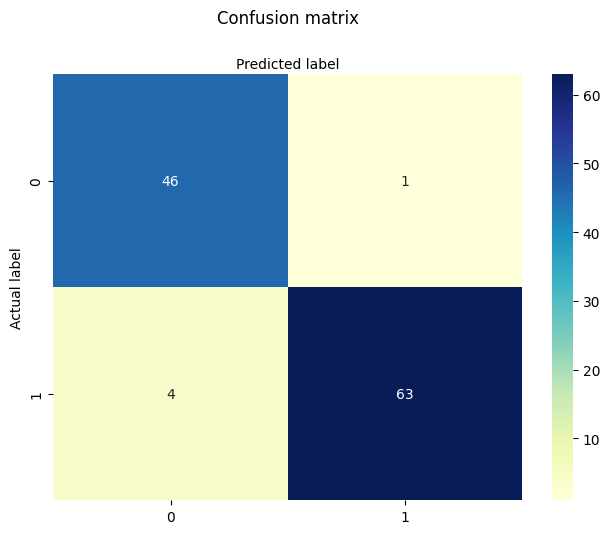

In [66]:

# Problem 2b

#C = [10, 1, .1, .001]
#for c in C:
#    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
#    clf.fit(X_train, Y_train)
#    print('C:', c)
#    print('Training accuracy:', clf.score(X_train, Y_train))
#    print('Test accuracy:', clf.score(X_test, Y_test))
#    print('')

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#model = LogisticRegression(solver='liblinear')
model = LogisticRegression(penalty='l1', C=1, solver='liblinear')
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)

report = classification_report(Y_test, predicted)
print(report)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
